In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# Punto 2

## b) Determine matemáticamente si las probabilidades de estar en $P, E, V, N$ escritas en el vector $\alpha = [0.3, 0.1, 0.5, 0.1]$ son probabilidades en estado estacionario.

In [2]:
M = np.array([[0.6, 0.2, 0, 0.2], [0.4, 0.3, 0.1, 0.2], [0.1, 0.7, 0.1, 0.1], [0, 0.2, 0.1, 0.7]])
alpha = np.array([0.3, 0.1, 0.5, 0.1])

print(f'a = {alpha}')
print(f'aM = {alpha@M}')

a = [0.3 0.1 0.5 0.1]
aM = [0.27 0.46 0.07 0.2 ]


## d) Las probabilidades de que el estudiante a las 4:00pm esté en las actividades $P,E,V,N$ son $[0.6,0.3,0.1,0]$. Encuentre las probabilidades de que el estudiante esté en cada una de las actividades $P,E,V,N$ a las 4:56pm

### Sabemos que
### $$a^{(n)} = a^{(0)}M^n$$
### en donde $a^{(0)} = [0.6,0.3,0.1,0]$

In [3]:
n = 56
a0 = np.array([0.6, 0.3, 0.1, 0])
a56 = a0@(np.linalg.matrix_power(M, n))

print(a56)

[0.28020566 0.2622108  0.07197943 0.38560411]


## e) Escriba una rutina en Matlab o Python que simule cada salto en una realización de esta cadena de Markov de 4:00pm a 4:56pm, conociendo que las probabilidades de que el estudiante esté a las 4:00pm en cada una de las actividades P, E, V y N son [0.6, 0.3, 0.1, 0]. Esta rutina sólo debe utilizar las probabilidades de transición de estados para determinar a qué estado saltar dado que está en un estado determinado (no puede utilizar la ecuación de recurrencias). Defina aleatoriamente el estado inicial de acuerdo con las probabilidades iniciales dadas. Corra esta rutina, y en una gráfica muestre la trayectoria del proceso (es decir, estado vs tiempo).

## Ayuda: Para determinar hacia qué estado saltar, haga un procedimiento equivalente a correr una ruleta. Por ejemplo, asuma que tenemos tres estados: A, B, y C. Asumiendo que estamos en el estado A, las probabilidad de hacer la transición hacia A es 0.1, de saltar de A a B es 0.5, y de saltar de A a C es 0.4. Se genera un número aleatorio con distribución uniforme entre 0 y 1. Si este número cae en el intervalo [0, 0.1] entonces la transición es hacia el estado A; si cae en el intervalo (0.1, 0.6] entonces la transición es hacia el estado B; y si cae en el intervalo (0.6, 1] entonces la transición es hacia el estado C.

In [4]:
# Definimos estados 
# P -> 1
# E -> 2
# V -> 3
# N -> 4

# Esta función asume que se tiene una longitud de estados igual a 4.
# Entrada: probabilidades de estar en cada estado.
# Salida: estado siguiente.
def salto(probs):
    
    rangos = np.cumsum(probs)
    num = np.random.uniform()
    estado = 0

    if num <= rangos[0]:
        estado = 1
    elif num > rangos[0] and num <= rangos[1]:
        estado = 2
    elif num > rangos[1] and num <= rangos[2]:
        estado = 3
    elif num > rangos[2] and num <= rangos[3]:
        estado = 4

    return estado 

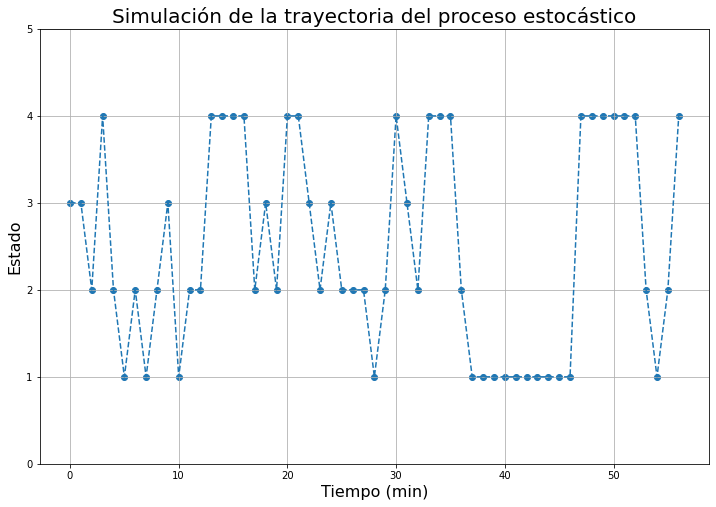

In [5]:
# Definición del proceso estocástico
def proc_estoc():
    probs_iniciales = [0.6, 0.3, 0.1, 0]
    probsP = M[0]
    probsE = M[1]
    probsV = M[2]
    probsN = M[3]

    tiempo = np.arange(1,57)

    # Se crea lista de estados y se define el primer estado conociendo las probabilidades iniciales. 
    estados = []
    next = salto(probs_iniciales)
    estados.append(next)

    # Para el resto de instantes de tiempo, se define el siguiente estado dependiendo del estado anterior.
    for i in range(len(tiempo)):
        if estados[i] == 1:
            next = salto(probsP)
            estados.append(next)
        if estados[i] == 2:
            next = salto(probsE)
            estados.append(next)
        if estados[i] == 3:
            next = salto(probsV)
            estados.append(next)
        if estados[i] == 4:
            next = salto(probsN)
            estados.append(next)

    return estados

# Se define un vector de tiempo para graficar contra un vector que represente una realización del proceso estocástico.
t = np.arange(57)
estados = proc_estoc()

# Gráfica
plt.figure(figsize=(12,8))
plt.plot(t, estados, '--')
plt.scatter(t, estados)
plt.grid()
plt.title('Simulación de la trayectoria del proceso estocástico', fontsize=20)
plt.xlabel('Tiempo (min)', fontsize=16)
plt.ylabel('Estado', fontsize=16)
_ = plt.yticks([0,1,2,3,4,5])

## f) Genere 10.000 realizaciones del proceso estocástico del enunciado e). Calculando la frecuencia relativa en estas 10.000 realizaciones en la hora 4:56pm, estime las probabilidades de que el estudiante esté en cada una de las actividades P, E, V y N a las 4:56pm y compare con el cálculo matemático hecho en d).

In [6]:
# Lista de realizaciones del proceso estocástico
realizaciones = []
for i in range(10000):
    realizaciones.append(proc_estoc())

# Contadores de la cantidad de veces que se cayó en el estado i en el tiempo t=56.
cant1 = 0
cant2 = 0
cant3 = 0
cant4 = 0

# Para cada realización se pregunta cuál fue su estado para ir incrementando el contador correspondiente.
for real in realizaciones:
    if real[len(real)-1] == 1:
        cant1+=1
    elif real[len(real)-1] == 2:
        cant2+=1
    elif real[len(real)-1] == 3:
        cant3+=1
    elif real[len(real)-1] == 4:
        cant4+=1

# Vector de probabilidades estimadas con las 10000 realizaciones
probs_estimadas = np.zeros((1,4))

probs_estimadas[:,0] = cant1/10000
probs_estimadas[:,1] = cant2/10000
probs_estimadas[:,2] = cant3/10000
probs_estimadas[:,3] = cant4/10000

# Se comparan las probabilidades
print(f'Las probabilidades analíticas de que el estudiante esté en cada una de las actividades P, E, V y N son\n {a56}\n')
print(f'Las probabilidades estimadas de que el estudiante esté en cada una de las actividades P, E, V y N son\n {probs_estimadas}\n')

Las probabilidades analíticas de que el estudiante esté en cada una de las actividades P, E, V y N son
 [0.28020566 0.2622108  0.07197943 0.38560411]

Las probabilidades estimadas de que el estudiante esté en cada una de las actividades P, E, V y N son
 [[0.2807 0.2579 0.0678 0.3936]]



In [7]:
# Calcular probabilidades estimadas para todo tiempo. Cada fila de esta matriz es una realización.
matriz_realizaciones = np.zeros((10000, len(realizaciones[0])))
for i in range(len(realizaciones)):
    matriz_realizaciones[i] = realizaciones[i]

# Tamaño de la matriz.
n, m = np.shape(matriz_realizaciones)

# Cantidad de 1s/2s/3s/4s en cada instante de tiempo: el j-ésimo componente representa la cantidad de 1s/2s/3s/4s en ese instante de tiempo. 
unos = np.zeros((len(realizaciones[0]),1))
doss = np.zeros((len(realizaciones[0]),1))
tress = np.zeros((len(realizaciones[0]),1))
cuatros = np.zeros((len(realizaciones[0]),1))

# Contadores para el estado i en el instante de tiempo j. 
cont1s = 0
cont2s = 0
cont3s = 0
cont4s = 0

# Se cuentan la cantidad de estados en cada instante de tiempo y se agregan a su vector correspondente.
for j in range(m):
    colj = matriz_realizaciones[:,j]
    for num in colj:
        if num == 1:
            cont1s+=1
        elif num == 2:
            cont2s+=1
        elif num == 3:
            cont3s+=1
        elif num == 4:
            cont4s+=1
    unos[j] = cont1s
    doss[j] = cont2s
    tress[j] = cont3s
    cuatros[j] = cont4s

    cont1s = 0
    cont2s = 0
    cont3s = 0
    cont4s = 0 

# Vectores de probabilidad estimada
probs1 = unos/10000
probs2 = doss/10000
probs3 = tress/10000
probs4 = cuatros/10000   

Text(0, 0.5, 'Probabilidad')

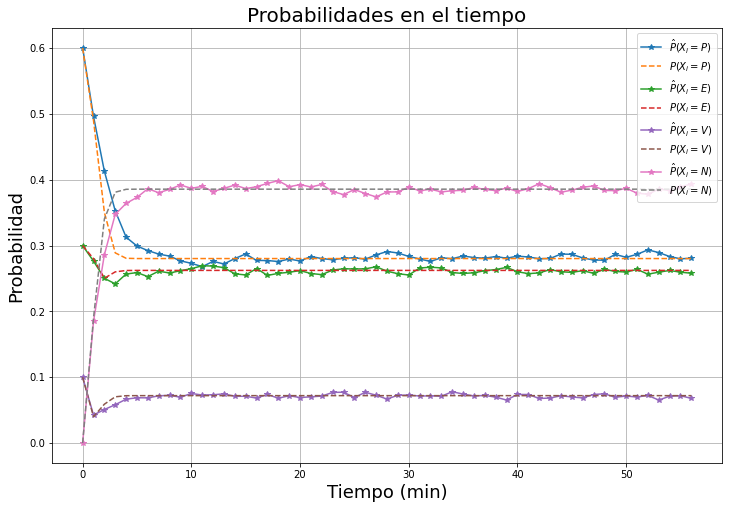

In [8]:
# Cálculo de probabilidades usando la ecuación de recurrencias
a0 = np.array([0.6, 0.3, 0.1, 0])

# Se crea una matriz en la que cada fila representa las probabilidades de estar en el estado (P,E,V,N) en el instante de tiempo i.
matriz_as = np.zeros((57,4))

# Se llena la primera fila conociendo las probabilidades iniciales (a0).
matriz_as[0,:] = a0@np.linalg.matrix_power(M, 0) # Se usa ecuación de recurrencias.

# Se llena cada fila de la matriz de acuerdo a la ecuación de recurrencias.
for i in range(1,57):
    matriz_as[i,:] = matriz_as[i-1,:]@np.linalg.matrix_power(M,i)

# Gráficas para comparar la estimación de cada probabilidad con la probabilidad encontrada con la ecuación de recurrencias.
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(t, probs1, '-*', label=r'$\hat{P}(X_i=P)$')
plt.plot(t, matriz_as[:,0], '--', label=r'$P(X_i=P)$')
plt.plot(t, probs2, '-*', label=r'$\hat{P}(X_i=E)$')
plt.plot(t, matriz_as[:,1], '--', label=r'$P(X_i=E)$')
plt.plot(t, probs3, '-*', label=r'$\hat{P}(X_i=V)$')
plt.plot(t, matriz_as[:,2], '--', label=r'$P(X_i=V)$')
plt.plot(t, probs4, '-*', label=r'$\hat{P}(X_i=N)$')
plt.plot(t, matriz_as[:,3], '--', label=r'$P(X_i=N)$')
plt.legend(loc="upper right")
plt.title('Probabilidades en el tiempo', fontsize=20)
plt.xlabel('Tiempo (min)', fontsize=18)
plt.ylabel('Probabilidad', fontsize=18)